In [28]:
import pandas as pd
import scipy.stats as st
import scipy.cluster as cl
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_excel('data.xlsx')

C:\Users\HP\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data.head()

,season,round,raceName,date,circuitId,circuitName,number,position,positionText,points,...,full name,dateOfBirth,nationality,constructorId,Constructor name,Constructor nationality,results.grid,results.laps,results.status,Circ Count
0,1950,1,British Grand Prix,1950-05-13,silverstone,Silverstone Circuit,2.0,1,1,9.0,...,Nino Farina,1906-10-30,Italian,alfa,Alfa Romeo,Italian,1,70,Finished,Silverstone Circuit
1,1950,1,British Grand Prix,1950-05-13,silverstone,Silverstone Circuit,3.0,2,2,6.0,...,Luigi Fagioli,1898-06-09,Italian,alfa,Alfa Romeo,Italian,2,70,Finished,NaN
2,1950,1,British Grand Prix,1950-05-13,silverstone,Silverstone Circuit,4.0,3,3,4.0,...,Reg Parnell,1911-07-02,British,alfa,Alfa Romeo,Italian,4,70,Finished,NaN
3,1950,1,British Grand Prix,1950-05-13,silverstone,Silverstone Circuit,14.0,4,4,3.0,...,Yves Cabantous,1904-10-08,French,lago,Talbot-Lago,French,6,68,+2 Laps,NaN
4,1950,1,British Grand Prix,1950-05-13,silverstone,Silverstone Circuit,15.0,5,5,2.0,...,Louis Rosier,1905-11-05,French,lago,Talbot-Lago,French,9,68,+2 Laps,NaN


In [4]:
data.describe()

,season,round,number,position,points,results.grid,results.laps
count,23641.000000,23641.000000,23635.000000,23641.000000,23641.000000,23641.000000,23641.000000
mean,1987.650184,8.136754,16.961455,13.075462,1.605116,11.260903,45.297407
std,18.020851,4.781516,13.663003,7.823679,3.671290,7.342453,30.555505
min,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1975.000000,4.000000,7.000000,7.000000,0.000000,5.000000,20.000000
50%,1989.000000,8.000000,15.000000,13.000000,0.000000,11.000000,52.000000
75%,2003.000000,12.000000,23.000000,19.000000,1.000000,17.000000,66.000000
max,2017.000000,21.000000,208.000000,39.000000,50.000000,34.000000,200.000000


In [5]:
data['nationality'].value_counts()


British              4134
Italian              3315
French               2747
German               2187
Brazilian            1935
American             1278
Finnish               955
Australian            718
Austrian              682
Spanish               654
Japanese              581
Belgian               558
Swiss                 496
Swedish               489
New Zealander         375
Dutch                 374
Argentine             373
Mexican               321
Canadian              289
South African         210
Russian               132
Colombian             125
Venezuelan            120
Danish                 96
Irish                  92
Portuguese             87
Polish                 76
Indian                 59
Chilean                37
Monegasque             29
Hungarian              20
Thai                   19
Rhodesian              18
Malaysian              16
Liechtensteiner        13
Indonesian             12
Uruguayan               7
East German             5
Czech       

As per the above data analysis, we understad that majority of the formula one drivers have been or are Brithsh. Based on this we also understand that why Formula one racing is so popular in United Kingdom. 

In [6]:
data['full name'].value_counts()

Rubens Barrichello    326
Jenson Button         309
Michael Schumacher    303
Fernando Alonso       293
Kimi Raikkonen        273
                     ... 
Ricardo LondoÃ±o        1
Rob Schroeder           1
Dennis Taylor           1
Peter Ashdown           1
Ray Reed                1
Name: full name, Length: 844, dtype: int64

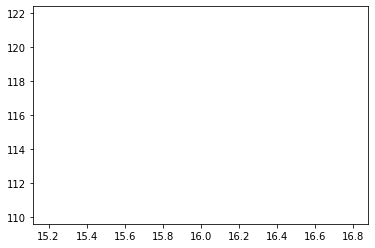

According to the above analysis, Rubens Barrichello has appeared in maximum number of races. And there have been in total 844 number of drivers.

In [8]:
data['circuitName'].value_counts()

Autodromo Nazionale di Monza     1668
Circuit de Monaco                1544
Silverstone Circuit              1276
Circuit de Spa-Francorchamps     1088
Nurburgring                       956
                                 ... 
Sebring International Raceway      19
Monsanto Park Circuit              16
Pescara Circuit                    16
Le Mans                            15
AVUS                               15
Name: circuitName, Length: 72, dtype: int64

According to the above analysis, most of the races were held at Monza.

In [9]:
number_of_podiums = []
for i in range(len(data['position'])):
    if data['position'][i] == 1:
        number_of_podiums.append(data['full name'][i])
        
sorting_number_of_podiums = sorted(number_of_podiums)
print(len(sorting_number_of_podiums))

974


In the above analysis we understand that there have been 974 total wins in total in races. Wins were by various drivers or the same driver has won multiple times. Number of wins per driver has been givern below in a dicrionary format.

In [10]:
counts = {}
#first iteration to create a dictionary with a value zero
for driver_name in sorting_number_of_podiums:
    counts[driver_name] = 0
    
#second iteration to increament the value
for index_ in range(len(sorting_number_of_podiums)):
    if sorting_number_of_podiums[index_] == (sorting_number_of_podiums[index_]):
        counts[sorting_number_of_podiums[index_]] += 1
    
print((counts))

{'Alain Prost': 51, 'Alan Jones': 12, 'Alberto Ascari': 13, 'Alessandro Nannini': 1, 'Ayrton Senna': 40, 'Bill Vukovich': 2, 'Bob Sweikert': 1, 'Bruce McLaren': 4, 'Carlos Pace': 1, 'Carlos Reutemann': 12, 'Clay Regazzoni': 5, 'Damon Hill': 22, 'Dan Gurney': 4, 'Daniel Ricciardo': 5, 'David Coulthard': 13, 'Denny Hulme': 8, 'Didier Pironi': 3, 'Eddie Irvine': 4, 'Elio de Angelis': 2, 'Emerson Fittipaldi': 14, 'Felipe Massa': 11, 'Fernando Alonso': 32, 'FranÃ§ois Cevert': 1, 'Gerhard Berger': 9, 'Giancarlo Baghetti': 1, 'Giancarlo Fisichella': 3, 'Gilles Villeneuve': 6, 'Graham Hill': 14, 'Gunnar Nilsson': 1, 'Heikki Kovalainen': 1, 'Heinz-Harald Frentzen': 3, 'Innes Ireland': 1, 'Jack Brabham': 14, 'Jackie Stewart': 27, 'Jacky Ickx': 8, 'Jacques Laffite': 6, 'Jacques Villeneuve': 11, 'James Hunt': 10, 'Jarno Trulli': 1, 'Jean Alesi': 1, 'Jean-Pierre Beltoise': 1, 'Jean-Pierre Jabouille': 2, 'Jenson Button': 15, 'Jim Clark': 25, 'Jim Rathmann': 1, 'Jimmy Bryan': 1, 'Jo Bonnier': 1, 'Jo 

In the above dictionary we can see the number of wins every driver has had. Since the data is only till 2017 we can see that the numbers are not accurate because we know that Lewis Hamilton has won more than 61 races until 2021.

In [11]:
driver_names_list = list(counts.keys())
number_of_wins_list = list(counts.values())

max_wins = (max(number_of_wins_list))
driver_name = ''

for key, value in counts.items():
    if value == max_wins:
        driver_name = key
        
print(f'Maximum number of wins as per the data, which is uptil 2017, was {max_wins} by {driver_name}.')

Maximum number of wins as per the data, which is uptil 2017, was 90 by Michael Schumacher.
